<a href="https://colab.research.google.com/github/Udit-Kalra-1117/Udit_Kalra_Research_Pyhton_Code/blob/main/Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
from google.colab import files
uploaded = files.upload() 

Saving Train.csv to Train (1).csv


In [188]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

In [189]:
df = pd.read_csv('Train (1).csv', header=0, infer_datetime_format=True, parse_dates=[0], index_col=[0])

In [190]:
df.index.infer_freq = 'MS'

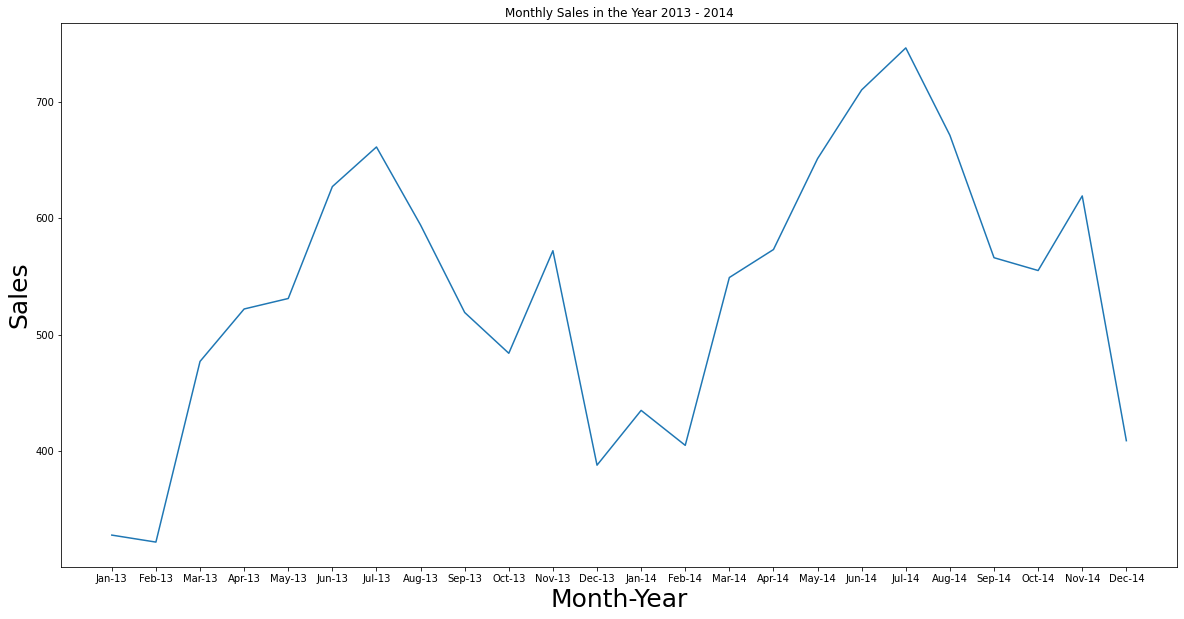

In [191]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
plt.title("Monthly Sales in the Year 2013 - 2014")
plt.xlabel("Month-Year",fontsize=25)
plt.ylabel("Sales",fontsize=25)
plt.plot(df)
plt.show()

In [192]:
df_train = df.iloc[:-12]
df_test = df.iloc[-12:]

In [193]:
model = HWES(df_train, seasonal_periods=12, trend='add', seasonal=None)
fitted = model.fit(optimized=True, use_brute=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [194]:
print(fitted.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                   12
Model:             ExponentialSmoothing   SSE                          88725.985
Optimized:                         True   AIC                            114.901
Trend:                         Additive   BIC                            116.840
Seasonal:                          None   AICC                           131.701
Seasonal Periods:                  None   Date:                 Sat, 25 Sep 2021
Box-Cox:                          False   Time:                         10:16:07
Box-Cox Coeff.:                    None                                         
                       coeff                 code              optimized      
------------------------------------------------------------------------------
smoothing_level            0.9140610                alpha                 True
smoothing_slope             0.0000

In [195]:
sales_forecast = fitted.forecast(steps=12)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


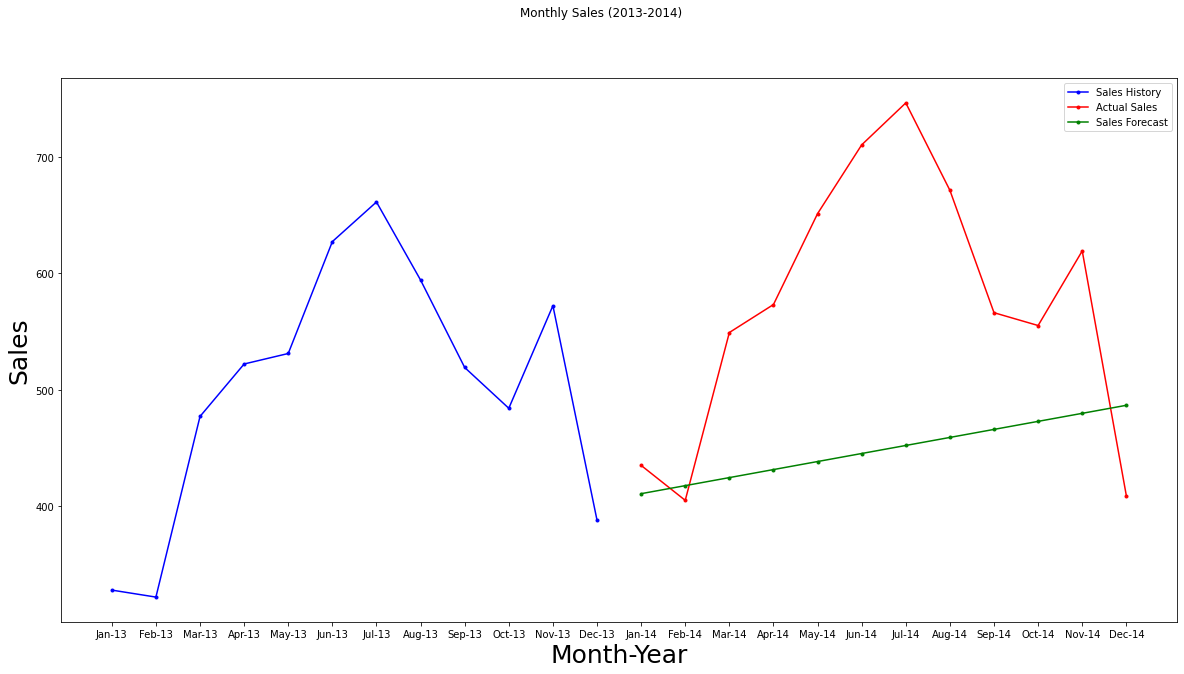

In [199]:
fig = plt.figure()
fig.suptitle('Monthly Sales (2013-2014)')
fig.set_figwidth(20)
fig.set_figheight(10)
plt.xlabel("Month-Year",fontsize=25)
plt.ylabel("Sales",fontsize=25)
past, = plt.plot(df_train.index, df_train, 'b.-', label='Sales History')
future, = plt.plot(df_test.index, df_test, 'r.-', label='Actual Sales')
predicted_future, = plt.plot(df_test.index, sales_forecast, 'g.-', label='Sales Forecast')
plt.legend(handles=[past, future, predicted_future])
plt.show()